# Description of the data

**Data used in the first part of the project**

*/datasets/hypotheses_us.csv*

* *Hypotheses* — brief descriptions of the hypotheses
* *Reach* — user reach, on a scale of one to ten
* *Impact* — impact on users, on a scale of one to ten
* *Confidence* — confidence in the hypothesis, on a scale of one to ten
* *Effort* — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

**Data used in the second part of the project**

*/datasets/orders_us.csv*

* *transactionId* — order identifier
* *visitorId* — identifier of the user who placed the order
* *date* — of the order
* *revenue* — from the order
* *group* — the A/B test group that the user belongs to

*/datasets/visits_us.csv*

* *date* — date
* *group* — A/B test group
* *visits* — the number of visits on the date specified in the A/B test group specified

## Download the data and prepare it for analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [3]:
merged_data = pd.merge(orders, visits, on=['date', 'group'])

In [4]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Hypothesis;Reach;Impact;Confidence;Effort  9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes


In [5]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

print(hypotheses)

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  


In [6]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


## Part 1. Prioritizing Hypotheses

* Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [7]:
hypotheses['ICE'] = hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Effort']

columns = ['Hypothesis','ICE']

pd.options.display.max_colwidth = 100

print(hypotheses[columns].sort_values(by='ICE', ascending=False).round(1))

                                                                                            Hypothesis  \
8                                     Launch a promotion that gives users discounts on their birthdays   
0                          Add two new channels for attracting traffic. This will bring 30% more users   
7             Add a subscription form to all the main pages. This will help you compile a mailing list   
6              Show banners with current offers and sales on the main page. This will boost conversion   
2  Add product recommendation blocks to the store's site. This will increase conversion and average...   
1                                    Launch your own delivery service. This will shorten delivery time   
5                                  Add a customer review page. This will increase the number of orders   
3  Change the category structure. This will increase conversion since users will find the products ...   
4                     Change the background co

* Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [8]:
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

columns = ['Hypothesis','RICE']

print(hypotheses[columns].sort_values(by='RICE', ascending=False))

                                                                                            Hypothesis  \
7             Add a subscription form to all the main pages. This will help you compile a mailing list   
2  Add product recommendation blocks to the store's site. This will increase conversion and average...   
0                          Add two new channels for attracting traffic. This will bring 30% more users   
6              Show banners with current offers and sales on the main page. This will boost conversion   
8                                     Launch a promotion that gives users discounts on their birthdays   
3  Change the category structure. This will increase conversion since users will find the products ...   
1                                    Launch your own delivery service. This will shorten delivery time   
5                                  Add a customer review page. This will increase the number of orders   
4                     Change the background co

* Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

When comparing the prioritization of hypotheses using RICE instead of ICE, we consider the additional factor of reach. RICE takes into account Reach, Impact, Confidence, and Effort, whereas ICE only considers Impact, Confidence, and Effort. Here's how the prioritization changes:

1. **Add a subscription form to all the main pages**: This hypothesis significantly jumps to the top of the list when using RICE. This is because adding a subscription form to all main pages has a high potential reach, as it affects all visitors to the site. Additionally, the impact and confidence levels might also be high, leading to a higher RICE score.

2. **Add product recommendation blocks to the store**: This hypothesis remains high on the list, as it still has a significant potential reach and impact. It involves modifying the store's layout to recommend products to customers, potentially increasing sales.

3. **Add two new channels for attracting traffic**: This hypothesis also remains relatively high but drops a bit compared to ICE. Although it still has a decent reach and impact, other hypotheses surpass it due to their potential reach and impact.

4. **Show banners with current offers and sales on the main page**: Similar to the previous one, this hypothesis maintains its position, but drops a bit compared to ICE due to other hypotheses having a potentially higher reach and impact.

5. **Launch a promotion that gives users discounts**: This hypothesis drops significantly when considering RICE. While it has a high impact, it may have limited reach compared to other hypotheses that can affect a wider audience.

6. **Change the category structure**: This hypothesis remains relatively low, as it might have limited reach and impact compared to others, and could potentially require significant effort to implement.

7. **Launch your own delivery service**: This hypothesis remains low, primarily due to its potentially limited reach and high effort requirement. It might not have as significant an impact on the overall business compared to other hypotheses.

8. **Add a customer review page**: This hypothesis also remains low, as its reach might not be as extensive, and the impact could be variable depending on the nature of the reviews.

**In summary**, the prioritization changes when using RICE instead of ICE because RICE considers the potential reach of each hypothesis, which can significantly influence its overall impact on the business. Hence, hypotheses with higher potential reach tend to rank higher in the prioritization when using RICE.

## Part 2. A/B Test Analysis

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [10]:
# Check for duplicates within group A
duplicates_in_group_A = orders[orders['group'] == 'A']['visitorId'].duplicated().any()

# Check for duplicates within group B
duplicates_in_group_B = orders[orders['group'] == 'B']['visitorId'].duplicated().any()

# Print the results
if duplicates_in_group_A:
    print("Duplicates found in group A.")
else:
    print("No duplicates found in group A.")

if duplicates_in_group_B:
    print("Duplicates found in group B.")
else:
    print("No duplicates found in group B.")

Duplicates found in group A.
Duplicates found in group B.


In [11]:
# Group orders by 'visitorId' and 'group', count occurrences
visitor_group_counts = orders.groupby(['visitorId', 'group']).size().unstack(fill_value=0)

# Check for visitors in both groups
visitors_in_both_groups = visitor_group_counts[(visitor_group_counts['A'] > 0) & (visitor_group_counts['B'] > 0)]

# Print visitors in both groups
print("Visitors in both groups:")
visitors_in_both_groups.head(10)

Visitors in both groups:


group,A,B
visitorId,,
8300375,1,1
199603092,4,1
232979603,1,1
237748145,4,1
276558944,1,1
351125977,1,1
393266494,1,2
457167155,1,3
471551937,1,1


In [12]:
# Identify duplicate visitors who appear in multiple groups
duplicate_visitors = orders[orders.duplicated(subset=['visitorId'], keep=False)]

# Decide which group to keep the visitor in (e.g., choose the first group)
duplicate_visitors_to_remove = duplicate_visitors.sort_values(by=['visitorId', 'group']).drop_duplicates(subset=['visitorId'], keep='last')

# Remove the duplicate entries for visitors who appear in multiple groups except for the chosen group
orders_cleaned = orders.drop(duplicate_visitors_to_remove.index)

# Print the cleaned DataFrame
print("DataFrame after removing visitors assigned to multiple groups:")
orders_cleaned.head(10)

DataFrame after removing visitors assigned to multiple groups:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [13]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


### Graph cumulative revenue by group. Make conclusions and conjectures.

In [14]:
# building an array with unique paired date-group values 
datesGroups = orders[['date','group']].drop_duplicates()

In [15]:
# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

With this code, it's as if we've been calculating the results of our test every day up to the current date and storing them in the rows of the ordersAggregated table. 

Let's do something similar to get the aggregated cumulative daily data on visitors:

In [16]:
# getting aggregated cumulative daily data on visitors  
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

We merge the two tables into one and give its columns descriptive names:

In [17]:
# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   2356.8       719
1  2019-08-01     B      21      20   1620.0       713
2  2019-08-02     A      44      38   3860.3      1338
3  2019-08-02     B      45      43   4243.8      1294
4  2019-08-03     A      68      62   5675.5      1845


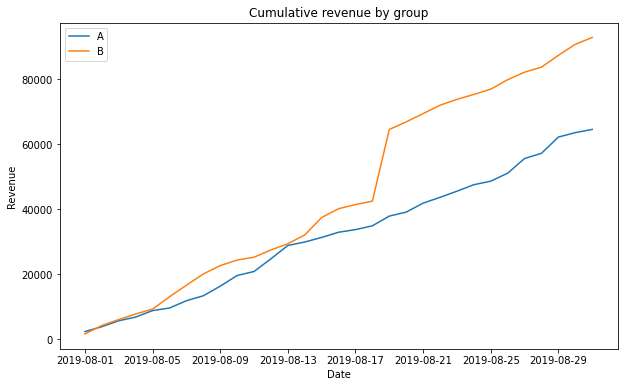

In [18]:
# Set the size of the figure
plt.figure(figsize=(10, 6))

# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# Set the frequency of x-axis tick labels
plt.xticks(cumulativeRevenueA['date'][::4])  # Show every 4th date

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Cumulative revenue by group')

plt.legend()

**Here are a few observations and conjectures based on the graph:**

1. **Overall Trend**: Both groups A and B show an increasing trend in cumulative revenue over time, which suggests growth in earnings for both groups.

2. **Growth Rate**: Initially, the cumulative revenue of group A and B seems to grow at a similar rate. However, after a certain point in time, group B's revenue growth accelerates significantly compared to group A, indicating a possible strategic advantage or a successful campaign or product launch that boosted B's earnings.

3. **Revenue Dips**: Group B experiences some dips where the revenue does not increase and actually slightly decreases at certain points. This could be due to seasonal fluctuations, customer refunds, or accounting adjustments.

4. **Comparison**: By the end of the time period shown, group B has a higher cumulative revenue than group A, even though it started at a similar level and experienced some decreases along the way. This suggests that group B’s strategy or market appeal has been more successful overall.

**Conjectures:**

- Group B could be implementing more effective marketing strategies or may have expanded its market reach.
- Group A has a steadier growth, which may indicate a more conservative approach or possibly a more saturated market.
- The sharp increases in group B's revenue could correspond to specific successful product launches or seasonal peaks.
- The dips in group B's revenue could suggest that while their highs are higher, they may also be facing greater volatility or risk in their revenue streams.


### Graph cumulative average order size by group. Make conclusions and conjectures.

Let's plot average order size by group. We'll divide cumulative revenue by the cumulative number of orders:

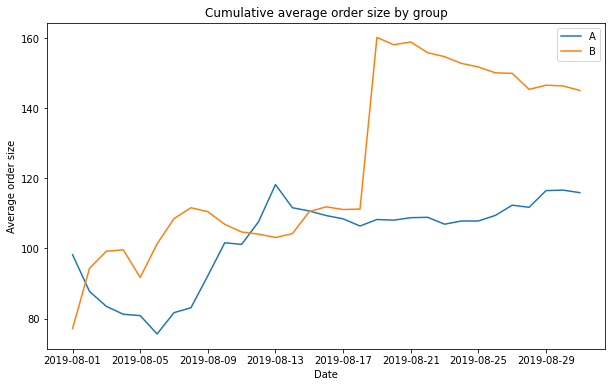

In [19]:
# Set the size of the figure
plt.figure(figsize=(10, 6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# Set the frequency of x-axis tick labels
plt.xticks(cumulativeRevenueA['date'][::4])  # Show every 4th date

plt.xlabel('Date')
plt.ylabel('Average order size')
plt.title('Cumulative average order size by group')

plt.legend()

The graph appears to represent the cumulative average order size over a month for two groups, A and B. From the data, we can infer the following:

1. **Variability**: Both groups show variability in average order size over the month, with several peaks and troughs. This could indicate that there are factors influencing purchase sizes that vary over time—perhaps due to promotional events, inventory changes, or external market factors.

2. **Significant Increase for Group B**: There is a sharp increase in Group B's average order size around the third week of August. This could be the result of a successful marketing campaign, the release of a high-demand product, or perhaps bulk purchasing by customers.

3. **Steady Growth for Group A**: Group A shows a more gradual growth in order size over the month. This could suggest that Group A's customer base is steadily increasing their purchase sizes, possibly due to growing trust in the brand or an expanding range of products.

4. **Group B's Decline**: After the sharp rise, Group B's average order size shows a significant decline. This might indicate the end of a promotion, stock issues, or a change in consumer behavior after an initial surge of interest.

5. **Comparison**: By the end of the month, despite the sharp increase and subsequent decline, Group B's average order size is greater than Group A's. This implies that even with fluctuations, Group B is experiencing a higher order value per customer on average.

**Conjectures**:
- Group B's marketing or sales strategies might be more aggressive or event-driven, causing significant short-term increases in average order size.
- Group A's strategy might focus on long-term customer value, with a more consistent growth in order size.
- The sharp decrease for Group B could suggest a need to evaluate the sustainability of their strategies for maintaining high order sizes.

### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

Let's plot a relative difference graph for the average purchase sizes. We'll add a horizontal axis with the axhline() method (i.e. horizontal line across the axis):

Text(0.5, 1.0, 'Relative difference in cumulative average order size for group B compared with group A')

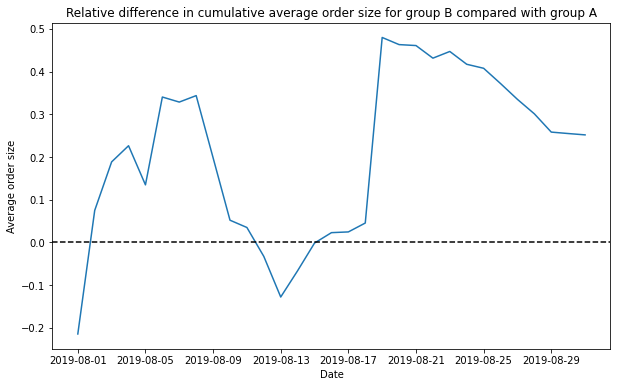

In [20]:
# Set the size of the figure
plt.figure(figsize=(10, 6))

# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# Set the frequency of x-axis tick labels
plt.xticks(cumulativeRevenueA['date'][::4])  # Show every 4th date

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Average order size')
plt.title('Relative difference in cumulative average order size for group B compared with group A')

The graph provided appears to depict the relative difference in cumulative average order size for Group B compared to Group A. Here’s what we can infer:

1. **Positive Values**: When the line is above the zero mark, it means Group B's cumulative average order size is larger than Group A's. This is the case for the majority of the month, which suggests that, on average, customers in Group B place larger orders than those in Group A.

2. **Negative Values**: There is a point where the line dips below zero, indicating that during this period, Group A had a larger cumulative average order size compared to Group B. This may have been due to a temporary event or promotion that increased Group A’s order sizes, or a decrease in Group B's average order size.

3. **Peaks and Valleys**: The graph shows volatility with sharp peaks and deep valleys, suggesting that the relative difference between the groups' order sizes changes significantly over time. This might be indicative of various external factors affecting buying behavior or could be the result of specific marketing campaigns or sales that temporarily boosted one group's order size over the other.

4. **Concluding Period**: Towards the end of the period, the relative difference decreases steadily, indicating that Group B's advantage in average order size is diminishing. This could be because Group A is catching up, Group B’s order sizes are decreasing, or a combination of both.

**Conjectures**:
- The sharp decline that takes the relative difference below zero might represent a highly successful promotion by Group A or a problematic issue for Group B, such as stockouts or negative publicity.
- The general pattern suggests that Group B’s order sizes are more volatile than Group A's, potentially indicating a customer base that is more reactive to external factors or promotions.
- The steady decline at the end could suggest a loss of momentum for Group B or successful efforts by Group A to increase their order sizes.

### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

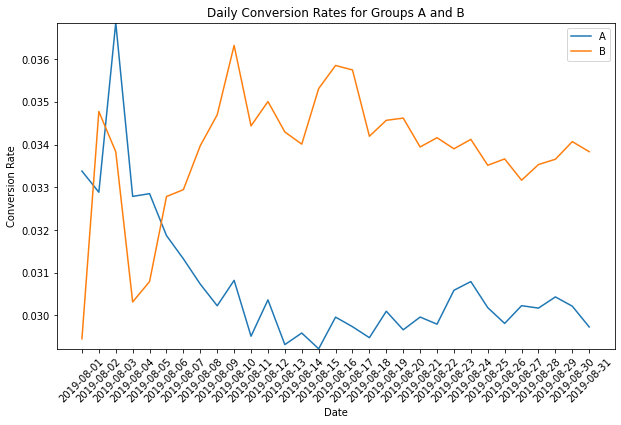

In [21]:
# Set the size of the figure
plt.figure(figsize=(10, 6))

# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()

# Adjusting the y-axis limits to automatically fit the data
plt.ylim(cumulativeData['conversion'].min(), cumulativeData['conversion'].max())

plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.title('Daily Conversion Rates for Groups A and B')
plt.legend()

plt.xticks(rotation=45)  # Rotate x-axis tick labels for better readability

plt.show()

The graph presents the daily conversion rates for Groups A and B over the month of August 2019. Here are the observations and potential conjectures:

1. **Initial Variability**: There is a lot of variability in the conversion rates for both groups at the start of the month. Group A in particular shows a sharp drop followed by a sharp rise. This could be due to external factors that had a significant but temporary impact, such as promotional events or technical issues on the website.

2. **Stabilization of Group A**: After the initial fluctuations, Group A's conversion rate stabilizes and maintains a relatively steady state. This could suggest that any issues affecting the conversion rate were resolved, or that the impact of any promotions normalized over time.

3. **Consistent Lead by Group B**: Group B consistently has a higher conversion rate than Group A throughout the month. This indicates that Group B's strategies or offerings might be more effective at converting visitors into customers.

4. **Decline in Group B's Rate**: Despite leading, Group B’s conversion rate shows a downward trend as the month progresses. This could indicate that the factors contributing to their higher conversion rate are becoming less effective over time or that customers are responding less to their offerings.

5. **End of Month Recovery for Group A**: Towards the end of the month, Group A's conversion rate starts to improve. This could be due to successful changes in strategy, increased effectiveness of marketing campaigns, or seasonal factors that affect buyer behavior.

**Conjectures**:
- The sharp variations at the start for Group A suggest that it could be more sensitive to external factors than Group B. It might benefit Group A to investigate what happened in early August to prevent future occurrences.
- Group B's consistently higher conversion rate might be due to a variety of factors such as better user experience, more compelling offers, or a more effective sales funnel.
- The decline in Group B's conversion rate might mean that their approach has a diminishing return over time, or it could be a sign of market saturation or increased competition. They may need to innovate or change tactics to maintain their lead.
- The overall higher conversion rate for Group B throughout the month suggests they may be doing something significantly different from Group A that resonates better with their audience.

Let's plot a relative difference graph for the cumulative conversion rates:

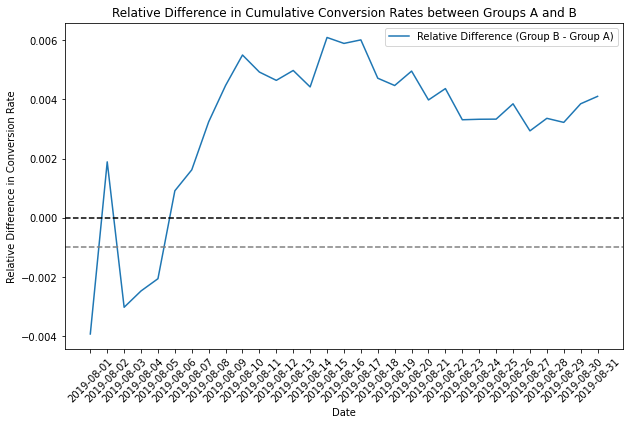

In [22]:
# Calculate cumulative conversion rates for each group
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A'].copy()
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B'].copy()

cumulativeDataA.loc[:, 'cumulative_conversion'] = cumulativeDataA['orders'] / cumulativeDataA['visitors']
cumulativeDataB.loc[:, 'cumulative_conversion'] = cumulativeDataB['orders'] / cumulativeDataB['visitors']

# Merge dataframes on date to ensure alignment
merged_data = cumulativeDataA.merge(cumulativeDataB, on='date', suffixes=('_A', '_B'))

# Calculate relative difference between conversion rates of groups A and B
merged_data['relative_difference'] = merged_data['cumulative_conversion_B'] - merged_data['cumulative_conversion_A']

# Plot the relative difference graph
plt.figure(figsize=(10, 6))
plt.plot(merged_data['date'], merged_data['relative_difference'], label='Relative Difference (Group B - Group A)')

plt.xlabel('Date')
plt.ylabel('Relative Difference in Conversion Rate')
plt.title('Relative Difference in Cumulative Conversion Rates between Groups A and B')
plt.legend()

plt.xticks(rotation=45)  # Rotate x-axis tick labels for better readability

plt.axhline(0, color='black', linestyle='--')  # Add horizontal line at y=0 for reference
plt.axhline(-0.001, color='grey', linestyle='--')

plt.show()


The graph displays the relative difference in cumulative conversion rates between Groups A and B over the course of August 2019. Here’s what can be concluded and conjectured from the graph:

1. **Group B's Superiority**: Group B generally has a higher conversion rate than Group A for most of the month, indicated by the relative difference being above the zero line. This suggests that Group B is more effective at converting visitors into customers.

2. **Early Dip Below Zero**: There is a moment early in the month when the relative difference dips below zero, indicating that Group A momentarily had a higher conversion rate than Group B. This could have been due to a successful promotion or some other temporary factor that favorably impacted Group A's performance.

3. **Stabilization Above Zero**: After the initial fluctuation, the relative difference stabilizes above zero. While it still shows some variability, it doesn't cross below the zero line again, indicating a consistent lead by Group B in conversion rate effectiveness.

4. **Gradual Decline**: Towards the end of the month, there's a gradual decline in the relative difference, suggesting that Group A may be improving its conversion rate or Group B's rate is decreasing. 

**Conjectures**:
- Group B's consistent lead suggests they have implemented strategies or offers that are resonating well with their audience. It would be worthwhile for Group A to analyze Group B's approach to identify what is working.
- The early dip for Group A might suggest that they are capable of achieving short-term gains, possibly through promotions or marketing efforts. However, maintaining these gains seems to be a challenge.
- The downward trend at the end of the month might suggest fatigue with Group B's approach, or it could reflect a successful adjustment or campaign from Group A. It may be that Group A's strategies take longer to gain traction but are starting to pay off.
- This graph could also signal the importance of continuously innovating and adapting strategies to maintain a competitive edge in conversion rates. Group B might need to explore new methods to maintain their lead.
- It's important to note that external factors such as seasonality, market trends, or changes in customer behavior could also be affecting these rates.

### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [23]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


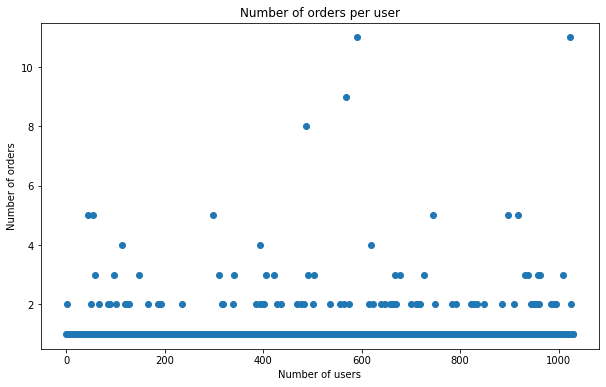

In [24]:
plt.figure(figsize=(10, 6))

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.xlabel('Number of users')
plt.ylabel('Number of orders')
plt.title('Number of orders per user')

plt.scatter(x_values, ordersByUsers['orders'])

Based on the distribution of points, we can infer the following:

1. **Majority Single Orders**: The vast majority of users have made a small number of orders, with a dense cluster of points at the bottom of the graph, close to 1. This suggests that most customers are one-time buyers or have made very few purchases.

2. **Few Repeat Customers**: There are some users with higher numbers of orders, up to 10 on this scale, but they are significantly fewer in number. This indicates that there are a few repeat customers who make multiple purchases.

**Conjectures**:
- The business could be heavily reliant on single-purchase customers and may benefit from strategies aimed at increasing customer retention and repeat purchases.
- The small number of high-order customers might be a target for loyalty programs or special marketing campaigns to further encourage their repeat business.
- The distribution could suggest that the barrier to repeat purchases is high or customer satisfaction might need improvement. Alternatively, the product or service might naturally have a low repeat purchase rate (such as high-ticket or infrequently purchased items).
- Customer segmentation based on the number of orders might reveal different purchasing behaviors, and tailored marketing to each segment could be effective.

### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [25]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


No more than 5% of users placed more than 2 orders, and 1% of users made more than four. 

### Plot a scatter chart of order prices. Make conclusions and conjectures.

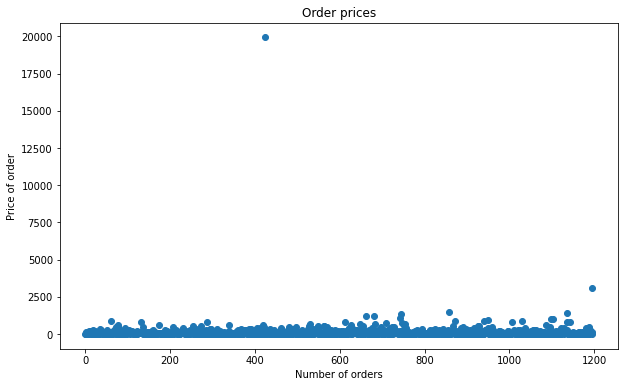

In [26]:
plt.figure(figsize=(10, 6))

plt.xlabel('Number of orders')
plt.ylabel('Price of order')
plt.title('Order prices')

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

The scatter plot appears to show the order prices plotted against the number of orders. Based on the distribution of data points on the chart, here are some conclusions and conjectures:

1. **Low Price Concentration**: The majority of orders are concentrated at the lower end of the price range. This suggests that lower-priced items are ordered more frequently, or that this is a price range that is more popular among customers.

2. **High Price Outliers**: There are a few orders with very high prices compared to the rest.

3. **Price Variation**: As the number of orders increases, the variation in order prices seems to increase as well. This could imply that with more transactions, there's a greater chance of encountering higher-priced orders.

**Conjectures**:
- The business could be primarily focused on selling lower-priced goods, with occasional sales of high-ticket items.
- The outliers could be due to special one-time purchases or could indicate the presence of different customer segments; for instance, both retail and wholesale buyers might be included in the data.
- It might be beneficial for the company to investigate the circumstances around the high-price orders to see if there is potential to increase sales in that segment without alienating the base of customers purchasing lower-priced items.
- The company may also want to look into whether the high-price orders correlate with specific products, times, or promotions to better understand how to replicate such sales.
- A strategy to gradually increase the average order value could be beneficial if the company typically deals with a high volume of low-priced orders.

### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [27]:
print(np.percentile(orders['revenue'], [95, 99]))

[435.54  900.904]


No more than 5% of orders cost more than 435.54, and no more than 1% cost more than 900.904. 


### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

**Null Hypothesis (H0):** There is no difference in conversion rates between group A and group B. In other words, the conversion rates for both groups are equal.

**Alternative Hypothesis (H1):** There is a difference in conversion rates between group A and group B. In other words, the conversion rates for both groups are not equal.

In [28]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

# Calculate the relative difference in means
relative_difference = sampleB.mean() / sampleA.mean() - 1

# Print the results with signed values
print("P-value: {:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Relative Difference in Means: {:.2f}%".format(relative_difference * 100))

P-value: 0.017
Relative Difference in Means: 13.81%


In [29]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 900000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

# Print the first 5 abnormal users and the total count
print(abnormalUsers.head(5))
print("Total abnormal users:", abnormalUsers.shape[0])


227    2038680547
326    2378935119
278    2458001652
499    4256040402
Name: visitorId, dtype: int64
Total abnormal users: 4


We have 4 anomalous users in total. 

The results from the provided code snippets are as follows:

1. The p-value from the Mann-Whitney U test is 0.017.
2. The relative difference in means between sampleB and sampleA is 0.138.

Based on these results:

1. **Statistical Significance**: The p-value (0.017) from the Mann-Whitney U test indicates that there is a statistically significant difference between the distributions of sampleA and sampleB. With a significance level typically set at 0.05, a p-value of 0.017 falls below this threshold, suggesting that the difference in the distributions is unlikely to be due to random chance alone.

2. **Effect Size**: The relative difference in means between sampleB and sampleA is 0.138, which indicates that sampleB has a 13.8% higher mean compared to sampleA. This suggests a practical significance, indicating that there is a substantial difference in the means of the two samples.

### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

**Null Hypothesis (H0):** There is no difference in the average order size between group A and group B. In other words, the average order size for both groups is equal.

**Alternative Hypothesis (H1):** There is a difference in the average order size between group A and group B. In other words, the average order size for one group is statistically significantly different from the other group.

In [30]:
# Calculate the p-value from the Mann-Whitney U test
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

# Calculate the relative difference in means
relative_difference = orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1

# Print the results with signs
print("P-value:", '{0:.3f}'.format(p_value))
print("Relative Difference in Means:",'{0:.3f}'.format(relative_difference))

P-value: 0.692
Relative Difference in Means: 0.252


The provided results are as follows:

1. The p-value from the Mann-Whitney U test is 0.692.
2. The relative difference in means between the experimental group (group B) and the control group (group A) is 0.252.

Based on these results:

1. **Statistical Significance**: The p-value (0.692) from the Mann-Whitney U test is higher than the conventional significance level of 0.05. This suggests that there is no statistically significant difference between the revenue distributions of the two groups. In other words, the difference observed in revenue between the groups could plausibly occur due to random chance alone.

2. **Effect Size**: The relative difference in means between group B and group A is 0.252, indicating that group B has a 25.2% higher mean revenue compared to group A. While this difference may seem substantial, it's important to note that without statistical significance, it cannot be conclusively attributed to the experimental condition.

### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

**Null Hypothesis (H0):** There is no difference in the average order size between group A and group B. In other words, the average order size for both groups is equal.

**Alternative Hypothesis (H1):** There is a difference in the average order size between group A and group B. In other words, the average order size for one group is statistically significantly different from the other group.

In [31]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [32]:
# Calculate the p-value from the Mann-Whitney U test
p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

# Calculate the relative difference in means
relative_difference = sampleBFiltered.mean() / sampleAFiltered.mean() - 1

# Print the results with signs
print("P-value:", '{0:.3f}'.format(p_value))
print("Relative Difference in Means:", '{0:.3f}'.format(relative_difference))

P-value: 0.016
Relative Difference in Means: 0.149


The provided results are as follows:

1. The p-value from the Mann-Whitney U test is 0.016.
2. The relative difference in means between sampleBFiltered and sampleAFiltered is 0.149.

Based on these results:

1. **Statistical Significance**: The p-value (0.016) from the Mann-Whitney U test falls below the conventional significance level of 0.05. This indicates that there is a statistically significant difference between the distributions of sampleAFiltered and sampleBFiltered. In other words, the observed difference in the metric being measured (e.g., conversion rate, average order size) between the two groups is unlikely to be due to random chance alone.

2. **Effect Size**: The relative difference in means between sampleBFiltered and sampleAFiltered is 0.149, suggesting that sampleBFiltered has a 14.9% higher mean compared to sampleAFiltered. This indicates a practical significance, indicating that there is a meaningful difference in the means of the two samples.

### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

In [33]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.960
0.235


The provided results are as follows:

1. The p-value from the Mann-Whitney U test is 0.960.
2. The relative difference in means between the revenue of group B (after filtering out abnormal users) and group A (after filtering out abnormal users) is 0.235.

Based on these results:

1. **Statistical Significance**: The high p-value (0.960) from the Mann-Whitney U test suggests that there is no statistically significant difference between the revenue distributions of group A and group B after filtering out abnormal users. This indicates that the observed difference in revenue between the two groups could plausibly occur due to random chance alone.

2. **Effect Size**: The relative difference in means between group B and group A (after filtering) is 0.235, suggesting that group B has a 23.5% higher mean revenue compared to group A after excluding abnormal users. While this difference may appear substantial, it's important to note that without statistical significance, it cannot be conclusively attributed to the experimental condition.

### Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

Based on the test results:

1. **Stop the test, conclude that there is no difference between the groups.**

The high p-value of 0.960 from the Mann-Whitney U test indicates that there is no statistically significant difference between the revenue distributions of group A and group B after filtering out abnormal users. Additionally, the relative difference in means between the two groups is 0.235, suggesting a moderate difference in revenue, but without statistical significance, it cannot be attributed to the experimental condition.

Therefore, it would be appropriate to stop the test and conclude that there is no significant difference between the groups in terms of revenue. Continuing the test would likely not yield different results given the lack of statistical significance. Instead, resources could be redirected to other initiatives or areas of improvement.